In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
mds = pd.read_csv("mobile.csv")

In [3]:
mds.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
mds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mds.duplicated().sum()

0

In [6]:
mds.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


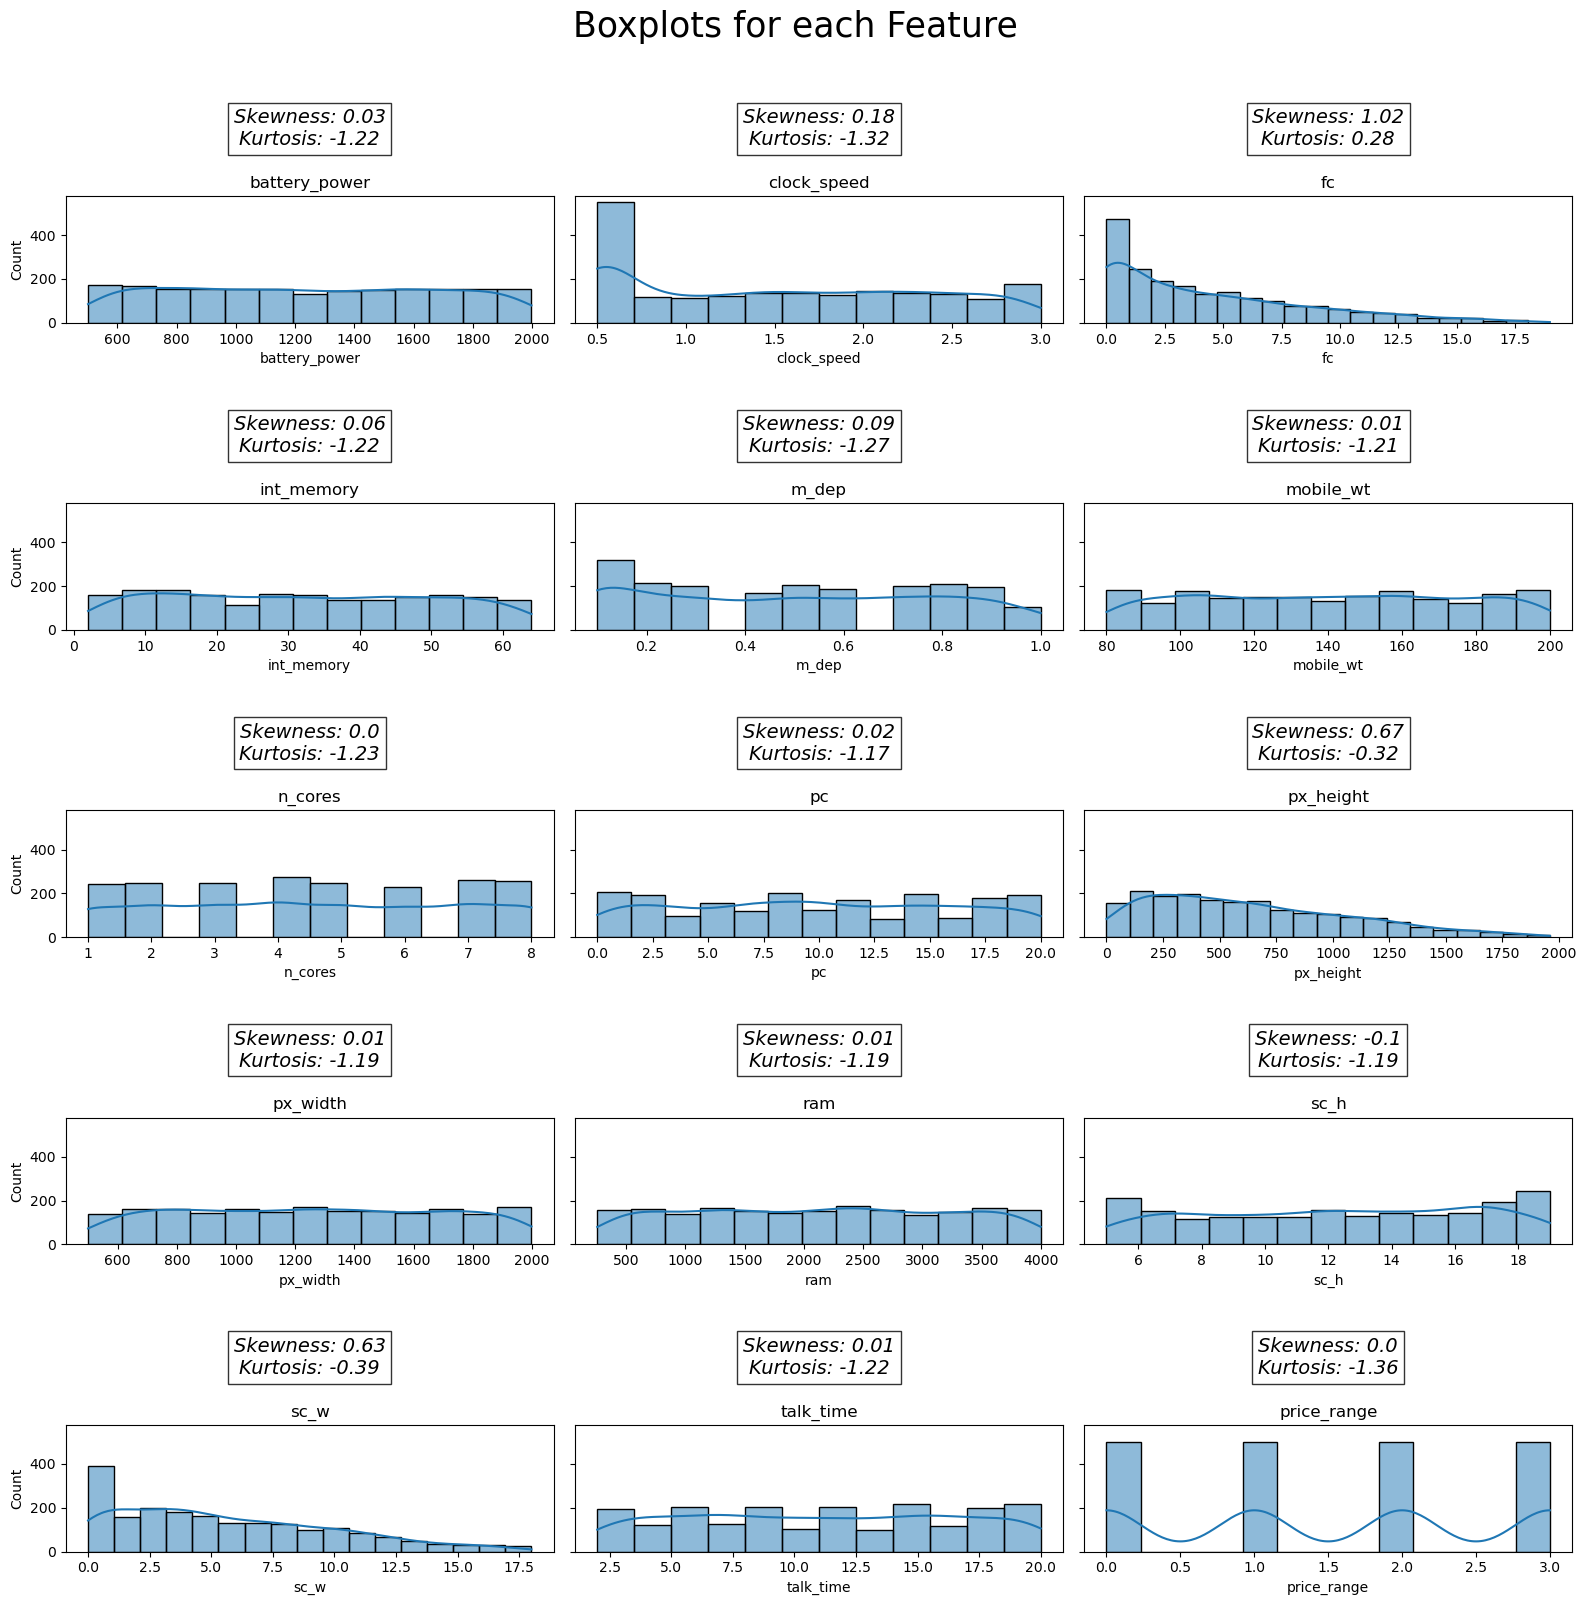

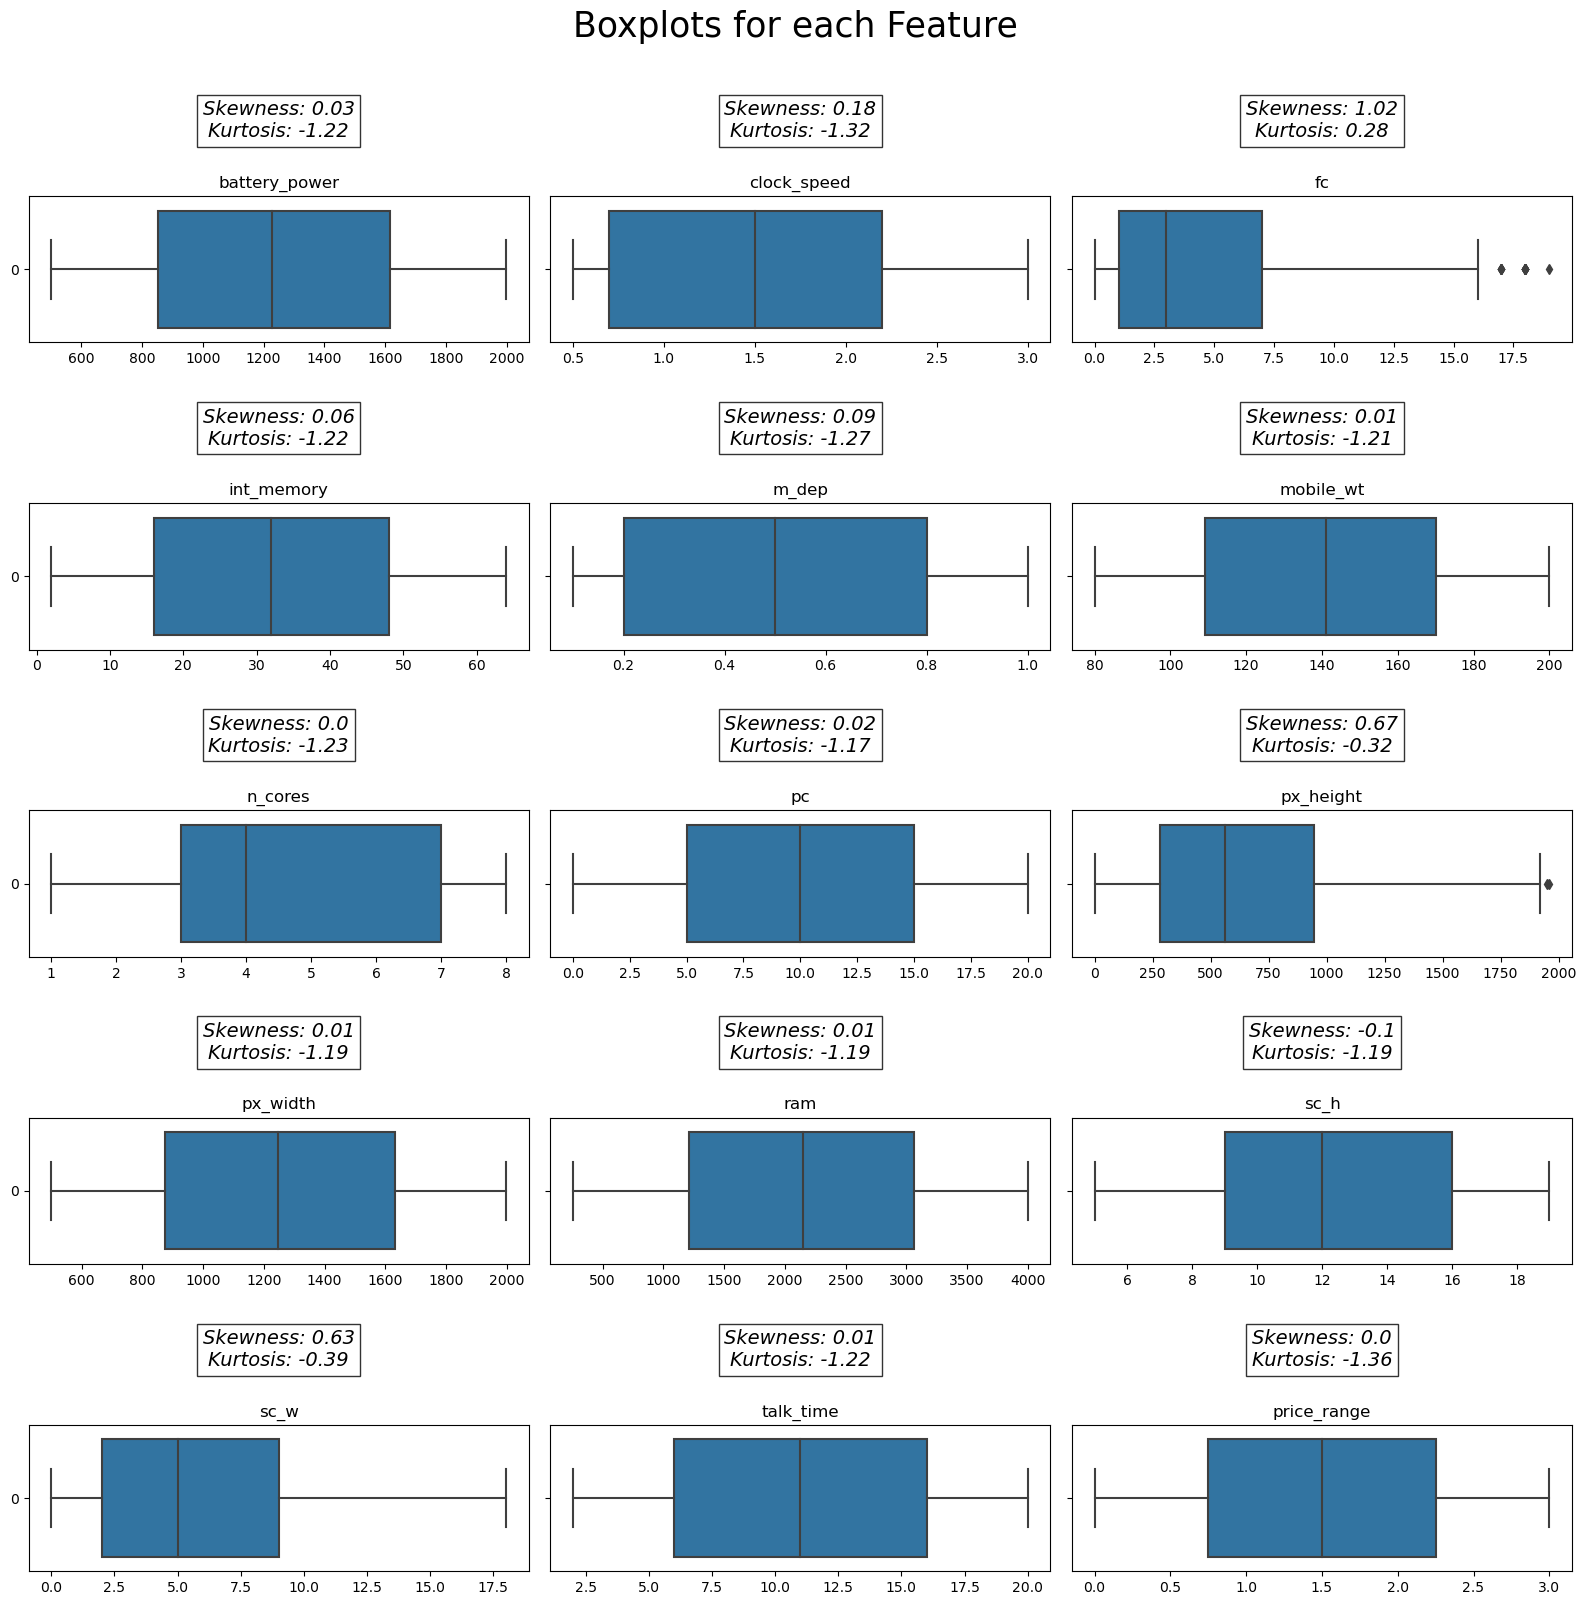

In [16]:
def plot(dataset, include_columns=None, exclude_columns=None,box= False ,hist=False, rows=1, cols=1, suptitle=''):
    if include_columns:
        columns_list = include_columns
    elif exclude_columns:
        columns_list = [col for col in dataset.columns if col not in exclude_columns]
    else:
        columns_list = list(dataset.columns)

    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16, 16))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    
    
    for i, data in enumerate(columns_list):
        if box == True:
            sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        elif hist == True:
            sns.histplot(dataset[data], ax=axs[i], kde =True)

        skewness = dataset[data].skew(skipna=True)
        kurtosis = dataset[data].kurt(skipna=True)

        axs[i].set_title(data)

        axs[i].text(
            0.5, 1.4,
            f'Skewness: {round(skewness, 2)}\nKurtosis: {round(kurtosis, 2)}',
            transform=axs[i].transAxes,
            ha='center',
            fontsize=14,
            color='black',
            style='italic',
            bbox={'facecolor': 'white', 'edgecolor': 'black', 'alpha': 0.8}
        )

    plt.tight_layout()
    plt.show()

exclude_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
plot(mds , exclude_columns=exclude_columns, hist=True , rows=5, cols=3, suptitle='Boxplots for each Feature')
plot(mds , exclude_columns=exclude_columns, box=True , rows=5, cols=3, suptitle='Boxplots for each Feature')

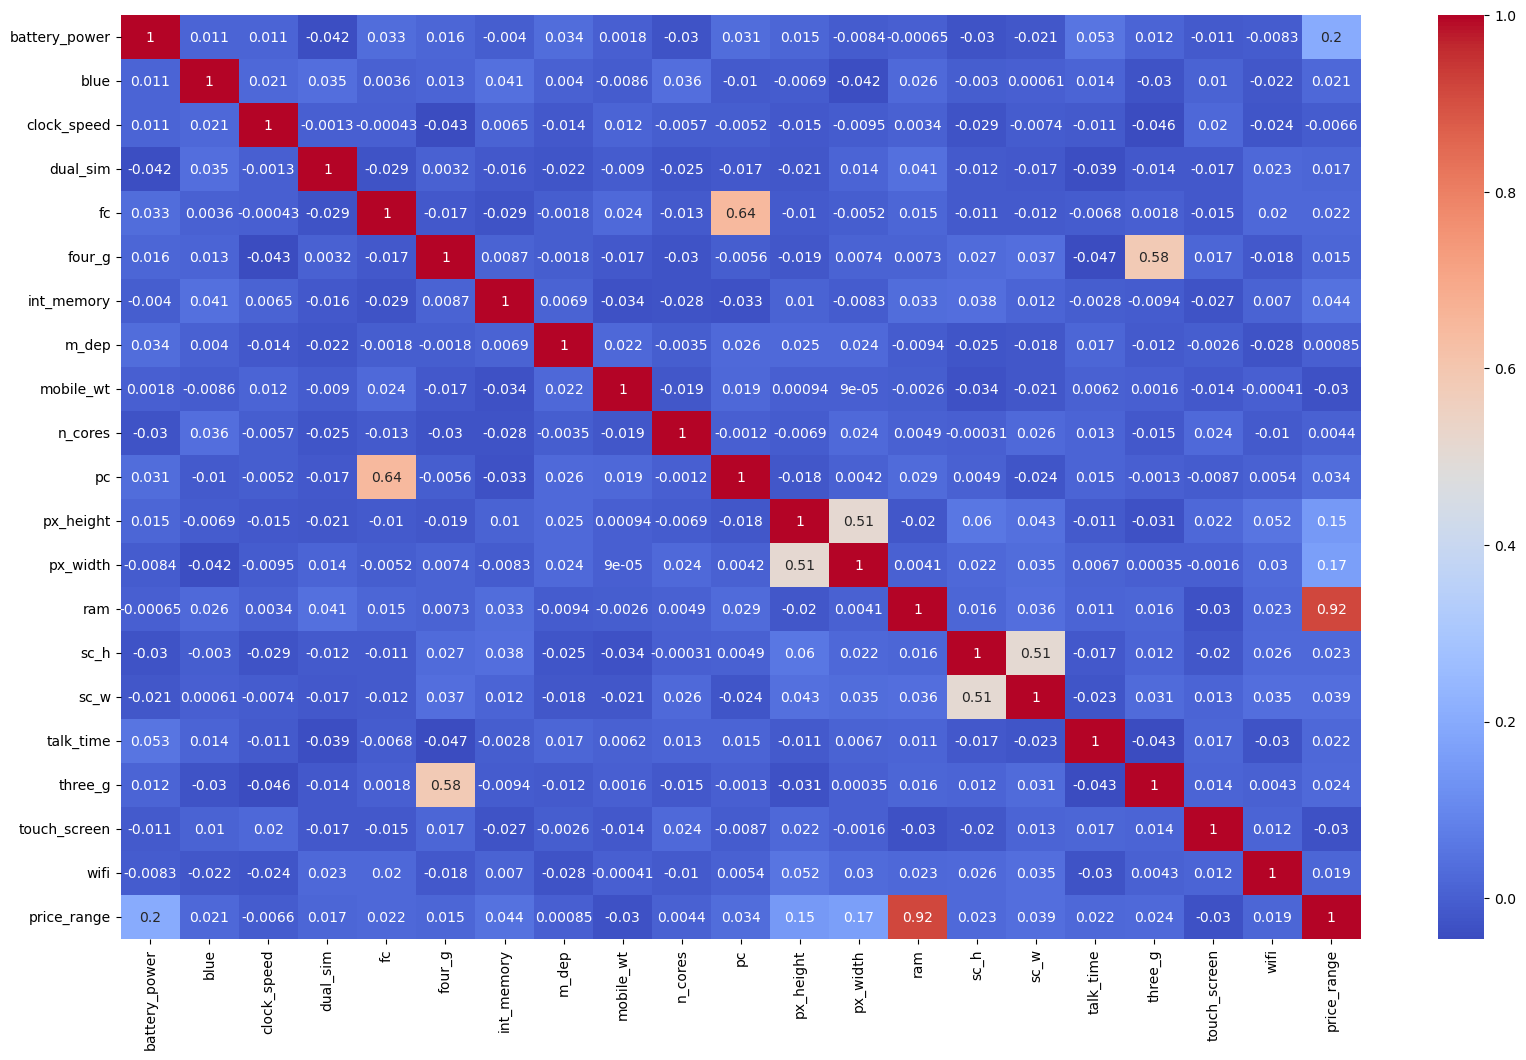

In [8]:
plt.figure(figsize=(20, 12))
correlation_matrix = mds.corr()
heatmap =sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.show()

In [19]:
x = mds.drop(["price_range"],axis=1)
y = mds[["price_range"]]

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.35)

In [25]:
display(x_train.head(),x_test.head(),y_train.head(),y_test.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1039,504,1,0.5,1,2,1,46,0.9,172,5,14,280,1795,2085,13,5,8,1,0,0
1956,555,1,0.5,1,2,0,17,0.2,163,5,12,956,1010,343,19,14,3,0,1,1
947,907,0,1.4,1,3,0,42,0.2,151,1,16,171,507,584,11,9,6,1,0,0
1691,1603,1,0.5,1,1,1,17,0.5,114,2,8,430,1207,1637,17,3,11,1,0,1
1610,1793,0,2.7,0,12,1,44,0.7,175,5,17,655,1459,2803,19,9,6,1,1,1


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1529,1831,1,2.2,1,4,0,55,1.0,189,8,9,1693,1790,1133,14,3,10,0,1,0
629,1914,0,0.7,0,1,0,35,0.6,118,8,2,942,1701,643,17,1,8,1,0,1
1875,868,1,0.9,0,5,0,5,0.4,137,4,7,40,1311,1519,13,0,2,0,0,1
617,1109,1,2.7,1,1,0,39,0.4,98,1,9,1391,1787,1524,15,10,7,1,1,1
1169,763,1,0.5,0,9,1,51,0.3,104,5,12,273,1278,2865,11,6,9,1,1,1


,price_range
1039,1
1956,0
947,0
1691,1
1610,3


,price_range
1529,1
629,1
1875,0
617,1
1169,2


In [28]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1300, 20), (1300, 1), (700, 20), (700, 1))